# [Hw05] Regression
Jeong Ji Hoon 2016010980

### Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

# 1.Load the Housing Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
                 header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = df.values

# 2.Draw Scatter Plot & Histogram

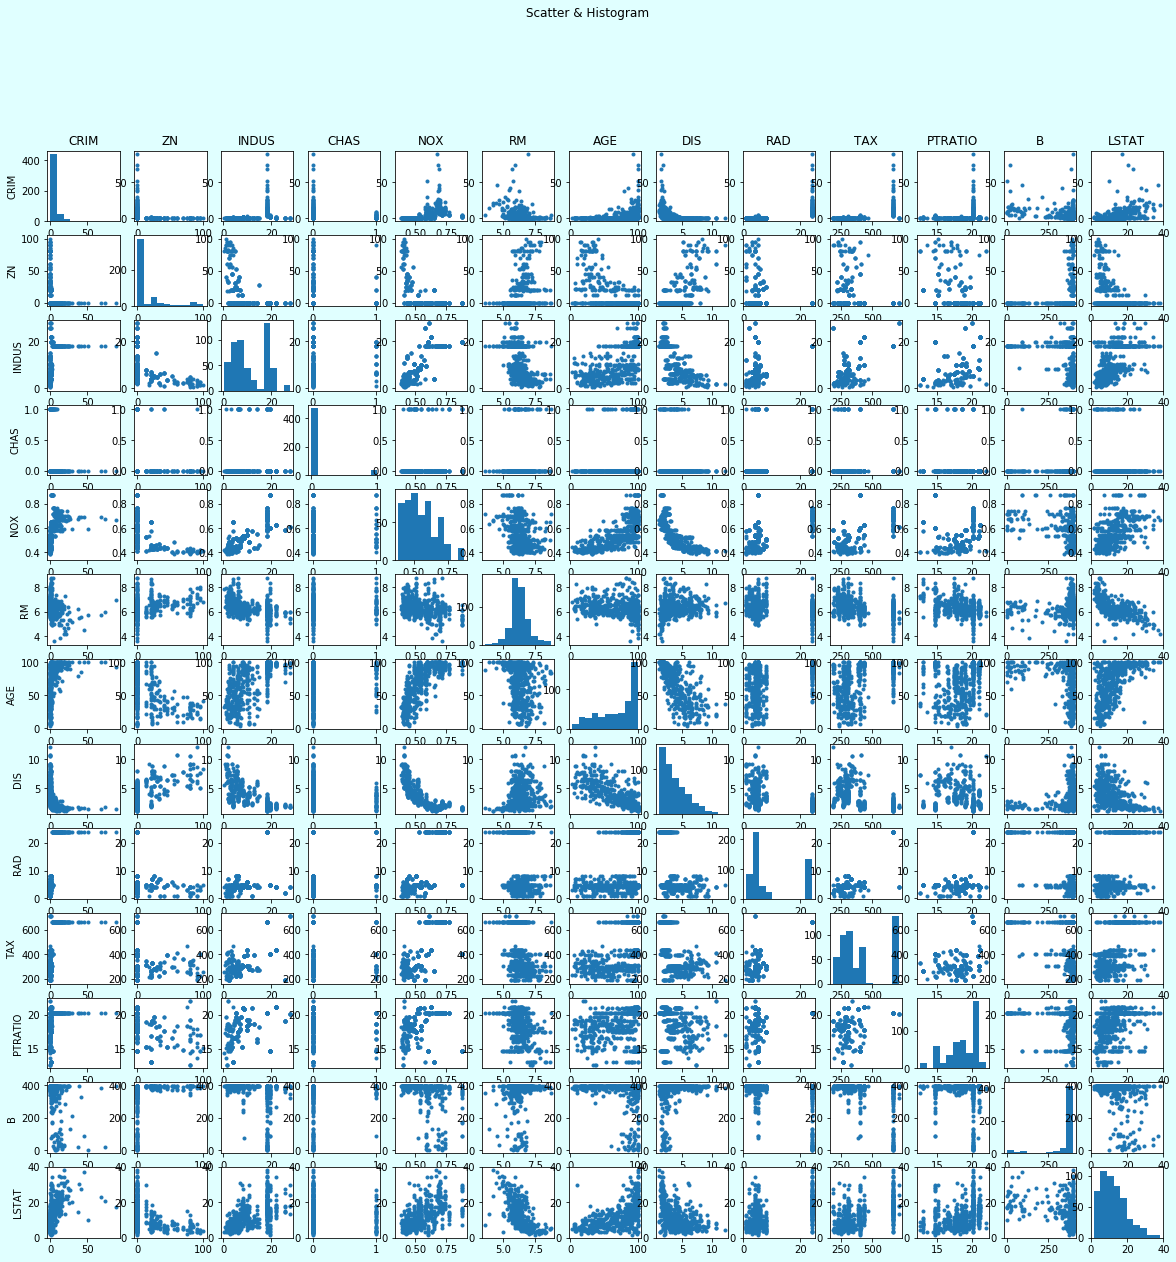

In [5]:
fig = plt.figure(figsize=(20,20))
fig.patch.set_facecolor('lightcyan')
fig.suptitle('Scatter & Histogram')

ax = fig.subplots(13,13)

for row in range(13):
    for col in range(13):
        if row == col:
            # 대각선 라인에 있으면 histogram 을 그리도록
            ax[row,col].hist(dataset[:,row])
        else:
            ax[row,col].scatter(dataset[:,col],dataset[:,row],marker='.')
        # subplot의 x축 y축 값들 표기를 위해서 ylabel(세로축)과 title(가로축)을 사용.
        if col == 0:
            ax[row,col].set_ylabel(df.columns[row])
        if row == 0:
            ax[row,col].set_title(df.columns[col])



### Observation
- 전체적인 변수들 간의 상관관계를 볼 수 있다.
- 하지만 13 by 13 그래프는 그리기도 힘들어하고 보기도 힘들다. 몇몇 개만 따로 보는 것이 좋을 듯 하다.
- 일부 변수들은 취할 수 있는 값의 종류에 제한이 있어서 특이한 그래프를 보여주기도 한다. (ex. CHAS)

# 3. Simple Linear Regression

## Define Class and Function 

In [6]:
# Class definition
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)



# Function Definition
def lin_regplot(X, y, model, ax):
    ax.scatter(X, y, c='steelblue', marker='.', edgecolor='white', s=70)
    ax.plot(X, model.predict(X), color='black', lw=2)
    return


## Draw Scatter & Decision Line Plots

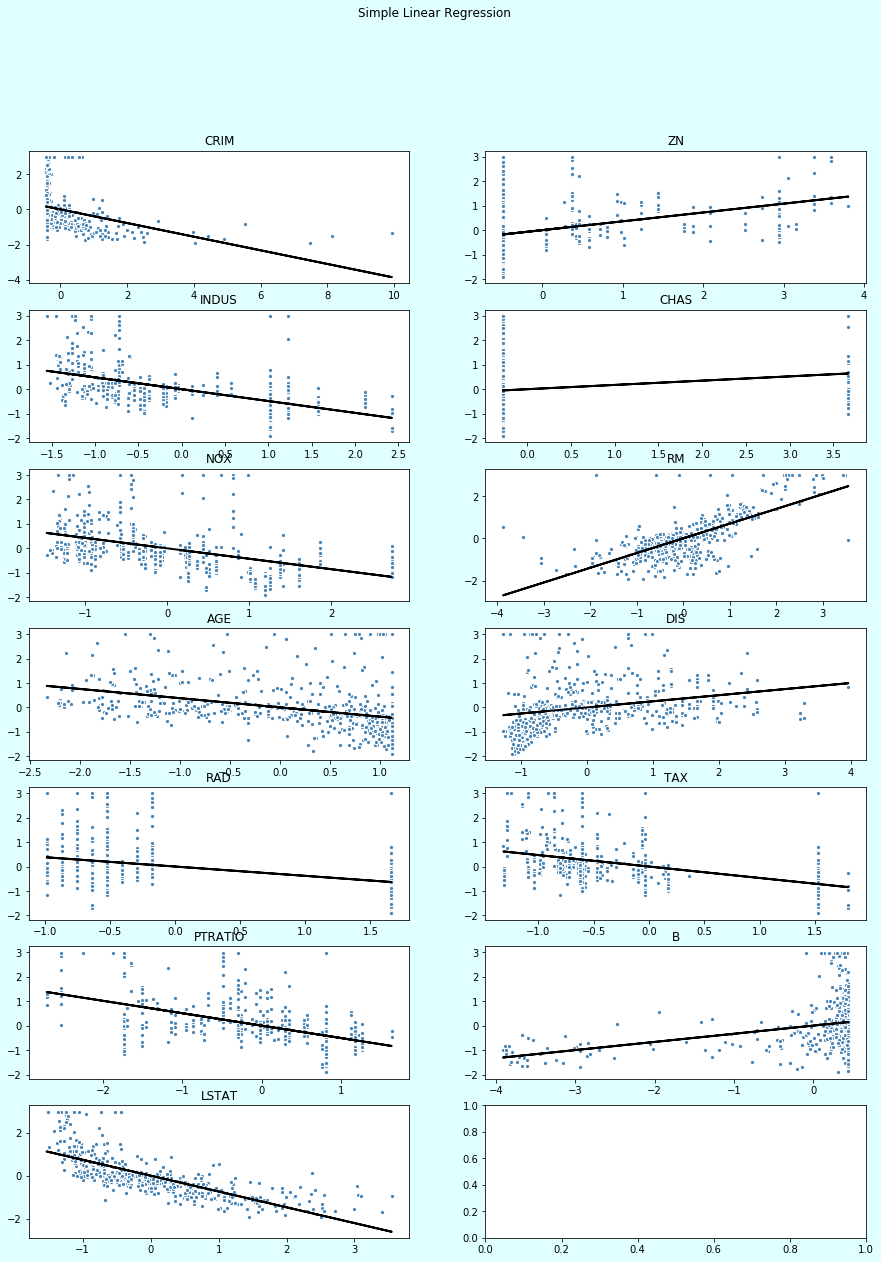

In [7]:

# Standardize y value
y = df['MEDV'].values
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

# Value holder for weights
weights = np.zeros([13,1])

# Figure for scatter plot & decision line
fig1 = plt.figure(figsize=(15,20))
fig1.patch.set_facecolor('lightcyan')
fig1.suptitle('Simple Linear Regression')
ax1 = fig1.subplots(7,2)

# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X)
            # Do the regression
            lr = LinearRegressionGD()
            lr.fit(X_std, y_std)
            # Save weight(slope)
            weights[idx] = lr.w_[1]
            # Plot
            lin_regplot(X_std,y_std,lr,ax1[row,col])
            ax1[row,col].set_title(df.columns[idx])

### Observation
- 값들이 다양하게 분포되어 있는 변수일 수록(분산이 클 수록) 회귀 그래프가 잘 fitting되는 것처럼 보인다.
- 앞서 언급한 취할 수 있는 값의 종류가 적은 변수들 중에서도 의외로 fitting이 되는 변수가 있었다.

## Draw Residual Plots

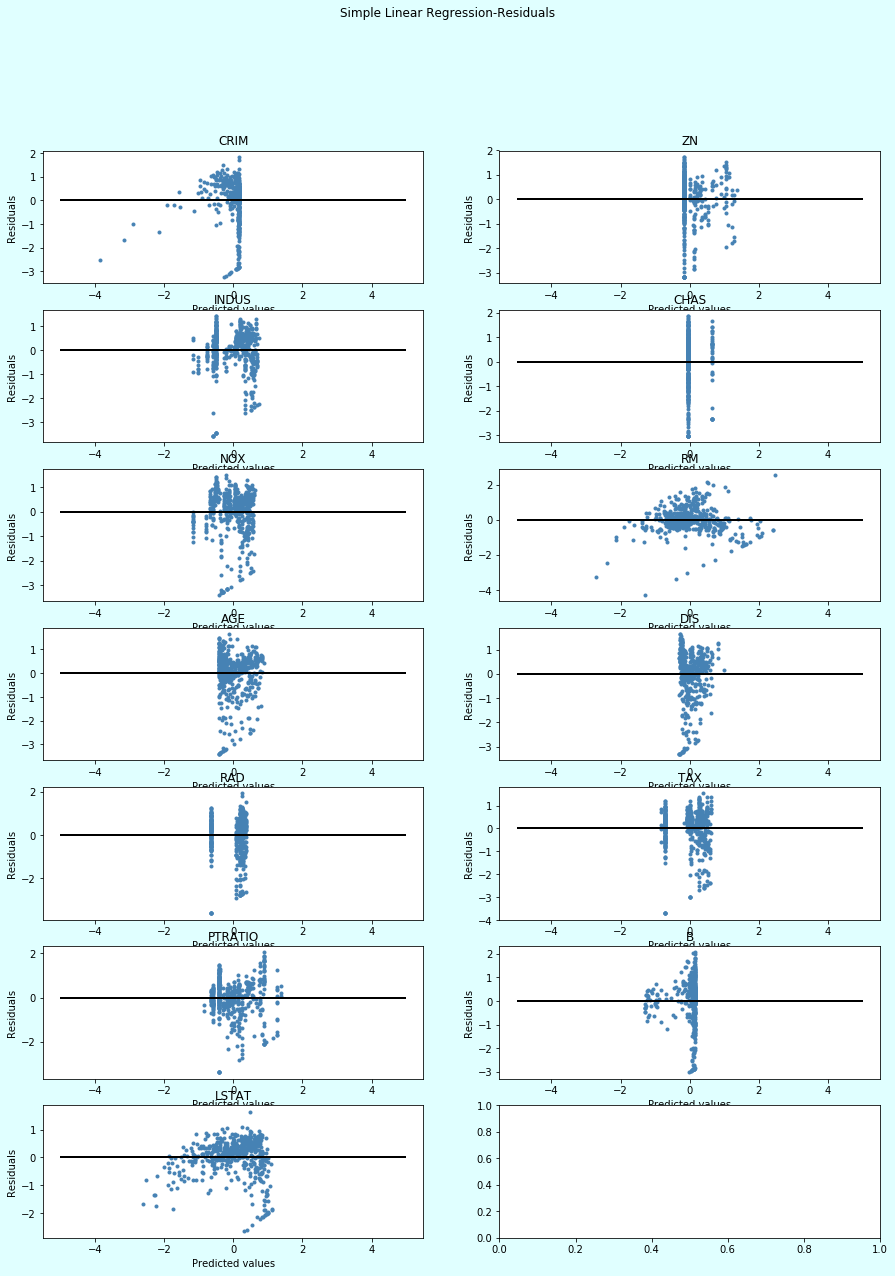

In [8]:
# Figure for residual plot
fig2 = plt.figure(figsize=(15,20))
fig2.patch.set_facecolor('lightcyan')
fig2.suptitle('Simple Linear Regression-Residuals')
ax2 = fig2.subplots(7,2)


# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X)
            # Do the regression
            lr = LinearRegressionGD()
            lr.fit(X_std, y_std)
            # Save weight(slope)
            weights[idx] = lr.w_[1]
            # Plot residuals
            ax2[row,col].scatter(lr.predict(X_std),lr.predict(X_std) - y_std, c='steelblue', marker='.')
            ax2[row,col].set_xlabel('Predicted values')
            ax2[row,col].set_ylabel('Residuals')
            ax2[row,col].hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)
            ax2[row, col].set_title(df.columns[idx])


### Observation
- B 변수는 scatter plot 에서도 일부가 극단치에 있는 경향이 있었는데 이는 residual graph 에서도 특성이 반영이 되었다.

## Correlations

In [9]:
# Print Correlation
for k in range(13):
    print(df.columns[k] + str(weights[k]))

CRIM[-0.38830432]
ZN[0.36044507]
INDUS[-0.4837248]
CHAS[0.17526005]
NOX[-0.42732045]
RM[0.69535943]
AGE[-0.37695428]
DIS[0.24992855]
RAD[-0.38162594]
TAX[-0.46853558]
PTRATIO[-0.50778631]
B[0.33346057]
LSTAT[-0.73766217]


In [10]:
# Find highly correlated features
sorted_features = np.argsort(np.abs(weights.T))
print("Top 3 most highly correlated Features")
t3feature = np.empty(3,dtype='int32')
for k in range(3):
    idx = sorted_features[0,12-k]
    t3feature[k] = idx
    print(df.columns[idx] + str(weights[idx]))

Top 3 most highly correlated Features
LSTAT[-0.73766217]
RM[0.69535943]
PTRATIO[-0.50778631]


### Observation
- LSTAT, RM, PTRATION 순으로 MEDV 와 높은 상관이 있었다.
- 각각 부적, 정적, 부적 상관을 보인다.

# 4. Multiple Linear Regression

- Multiple Linear Regression의 경우 (y 포함) 변수가 4개가 등장하기에 평면에 나타낼 수 없으므로 Residual 그래프와 R2 값만 구했다.

## Draw Residual Plots

R2 Score : 0.679


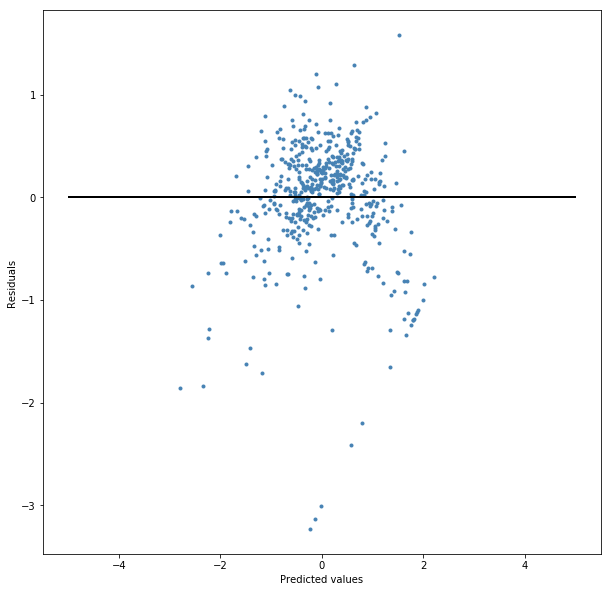

In [11]:

# create X matrix
multi_X = dataset[:,t3feature]
# Standardize the X
sc_multi_X = StandardScaler()
multi_X_std = sc_multi_X.fit_transform(multi_X)
# Do the regression
lr = LinearRegressionGD()
lr.fit(multi_X_std, y_std)
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(lr.predict(multi_X_std),lr.predict(multi_X_std) - y_std, c='steelblue', marker='.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)

print("R2 Score : %.3f"%r2_score(y_std,lr.predict(multi_X_std)))

### Observation
- Multiple Regression의 경우 R2 score 값이 0.679가 나왔다.
- 단일 feature로 regression은 돌렸을 떄 나온 R2 Score는 0.54(=LSTAT[-0.73766217]^2)이다.
    이 점을 감안하면 더 많은 변수를 모델에 집어넣었더니 데이터에 더 잘 fitting이 되는 것을 볼 수 있다.

# 5. Polinomial(cubic) regression

## 5-1. Simple (one feature)

## Draw Scatter & Decision Line Plots

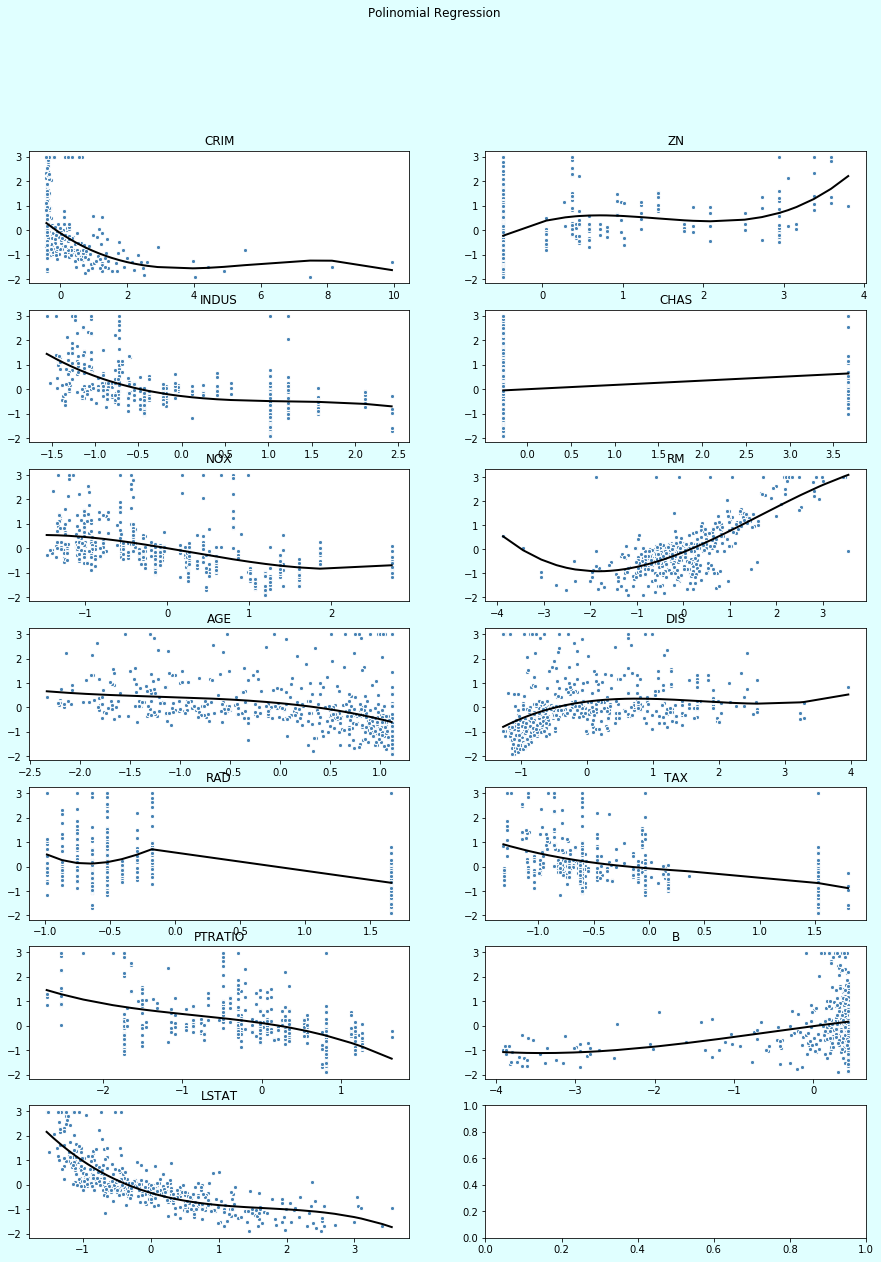

In [21]:
cubic = PolynomialFeatures(degree=3)

# Figure for scatter plot & decision line
fig = plt.figure(figsize=(15,20))
fig.patch.set_facecolor('lightcyan')
fig.suptitle('Polinomial Regression')
ax = fig.subplots(7,2)

# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            # Make Cubic Terms
            X_cubic = cubic.fit_transform(X)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X_cubic)
            # Do the regression
            lr = LinearRegression()
            lr.fit(X_std, y_std)
            # Plot
            # X 데이터가 순차적으로 되어 있지 않기에 plot 함수를 그대로 사용하면 거미줄이 연성된다.
            # 고로, argsort 함수로 X 값을 순차적으로 정렬한 뒤, 이 정렬기준을 그대로 적용해서 y_std 값을 feed 해주면 제대로 그려짐.
            sc_singleX = StandardScaler()
            singleX = sc_singleX.fit_transform(X)
            order = np.argsort(singleX, 0).T[0]
            ax[row,col].scatter(singleX, y_std, c='steelblue', marker='.', edgecolor='white', s=70)
            ax[row,col].plot(singleX[order], lr.predict(X_std)[order], color='black', lw=2)
            ax[row,col].set_title(df.columns[idx])

### Observation
- 여기 바꿔라ㅏ라ㅏㅏㅏㅏㅏㅏ

## Draw Residual Plots

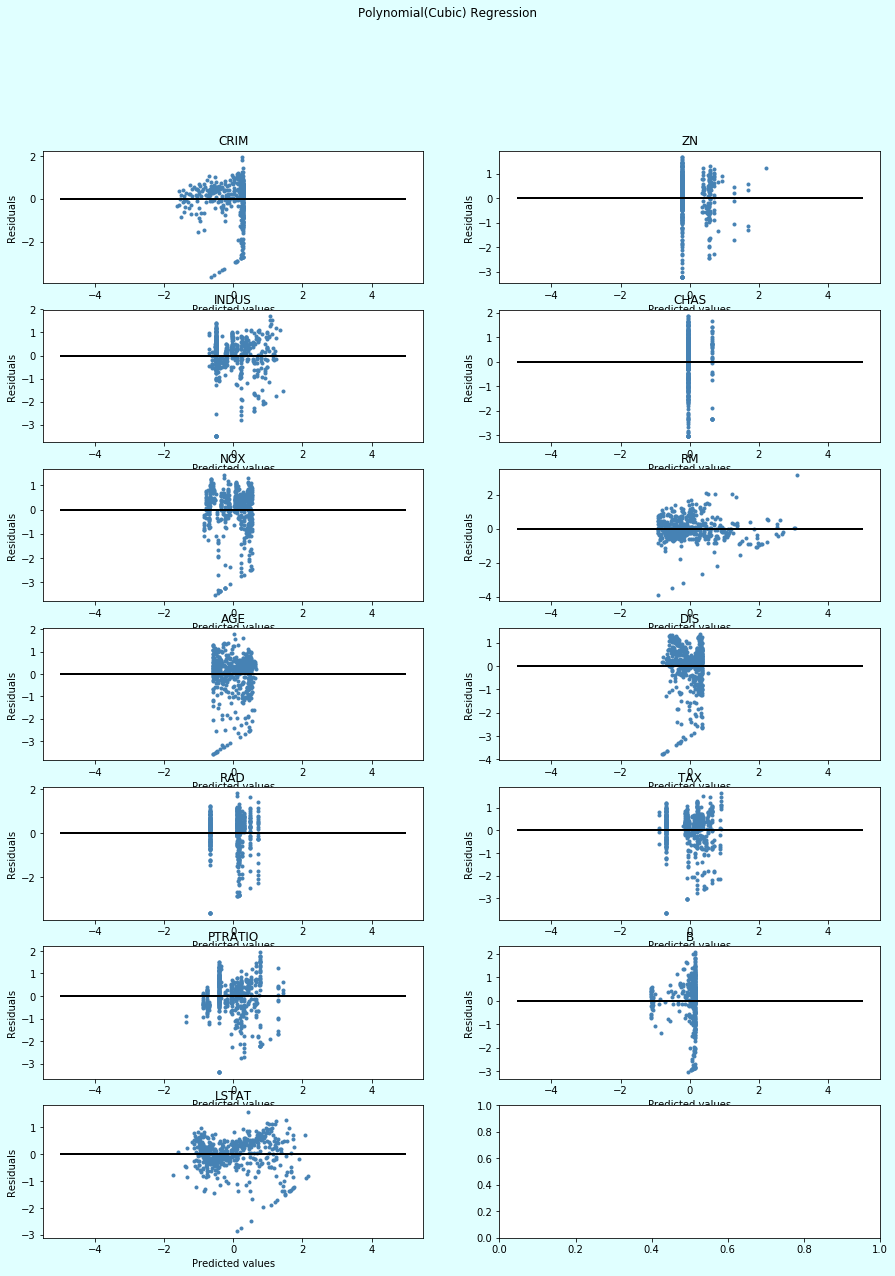

In [22]:
# Figure for residual plot
fig = plt.figure(figsize=(15,20))
fig.patch.set_facecolor('lightcyan')
fig.suptitle('Polynomial(Cubic) Regression')
ax = fig.subplots(7,2)

# Value holder for r2 value
scores = np.zeros([13,1])

# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            # Make Cubic Terms
            X_cubic = cubic.fit_transform(X)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X_cubic)
            # Do the regression
            lr = LinearRegression()
            lr.fit(X_std, y_std)
            # Save fitting score
            scores[idx] = r2_score(y_std,lr.predict(X_std))
            # Plot residuals
            ax[row,col].scatter(lr.predict(X_std),lr.predict(X_std) - y_std, c='steelblue', marker='.')
            ax[row,col].set_xlabel('Predicted values')
            ax[row,col].set_ylabel('Residuals')
            ax[row,col].hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)
            ax[row, col].set_title(df.columns[idx])


### Observation
- simple linear regression에 비해서 0 지점에 데이터가 모여있는 경향이 있다.

## Selection 3 Features

In [23]:
# Print Correlation(r2 score)
for k in range(13):
    print(df.columns[k] + str(scores[k]))

CRIM[0.21770489]
ZN[0.1649246]
INDUS[0.27683435]
CHAS[0.03071613]
NOX[0.19386607]
RM[0.56122572]
AGE[0.15657302]
DIS[0.10502427]
RAD[0.17668772]
TAX[0.22610442]
PTRATIO[0.26685064]
B[0.11353945]
LSTAT[0.65784764]


In [24]:
# Find highly correlated features
sorted_features = np.argsort(np.abs(scores.T))
print("Top 3 most highly correlated Features")
t3feature = np.empty(3,dtype='int32')
for k in range(3):
    idx = sorted_features[0,12-k]
    t3feature[k] = idx
    print(df.columns[idx] + str(scores[idx]))


Top 3 most highly correlated Features
LSTAT[0.65784764]
RM[0.56122572]
INDUS[0.27683435]


### Observation
- Polinomial regression 에서는 하나의 feature를 사용해 만든 둘 이상의 변수가 관여하기에 상관계수를 뽑아낼 수 없다. 
- 그래서 피어슨 상관계수의 제곱인 R2를 사용해서 여러 polinomial 모델중 가장 R2가 높은 모델을 3개 선택, 이 polinomial을 만드는데 사용된 feature를 가지고 진행을 했다.

## 5-2. Multiple (3 Features, each Polynomials)

## Draw Residual Plots

R2 Score : 0.754


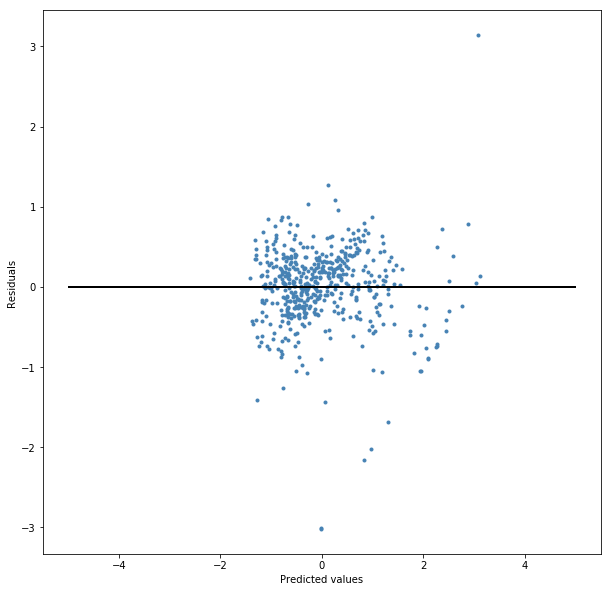

In [26]:
# Create X dataset
# 
# 선택된 feature는 총 3개.
# 각각의 feature 마다 PolynomialFeatures를 사용해서 0차항부터 3차항까지 새로운 변수들을 만든다면
# 총 4(0차~3차) x 3(feature 3개) = 12열의 어레이가 X로 사용이 된다.

multi_X_cubic = np.empty([np.size(multi_X,0),4*3])
for i in range(3):
    X = dataset[:,t3feature[i]].reshape(-1,1)
    X_cubic = cubic.fit_transform(X)
    multi_X_cubic[:,4*i:4*(i+1)] = X_cubic

# Standardize the X
sc_multi_X = StandardScaler()
multi_X_std = sc_multi_X.fit_transform(multi_X_cubic)
# Do the regression
lr = LinearRegression()
lr.fit(multi_X_std, y_std)
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(lr.predict(multi_X_std),lr.predict(multi_X_std) - y_std, c='steelblue', marker='.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)

print("R2 Score : %.3f"%r2_score(y_std,lr.predict(multi_X_std)))

### Observation
- 총 12개의 변수가 사용됨.
- (실질적으로는 9개. 매 feature의 Polynomial 마다 0차항이 하나씩 들어가는데 이 변수는 무시해도 되므로 각 feature 마다 1차~3차항 까지 총 3개의 변수가 들어감)
- R2 score가 가장 높게 나타남.

# 6. Random Forest Regression

## 6-1. Simple (one feature)

In [ ]:
# Figure for scatter plot & decision line
fig = plt.figure(figsize=(15,20))
fig.patch.set_facecolor('lightcyan')
fig.suptitle('Random Forest Regression')
ax = fig.subplots(7,2)

# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X)
            # Do the regression
            forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
            forest.fit(X_std, y_std)
            # Plot
            # X 데이터가 순차적으로 되어 있지 않기에 plot 함수를 그대로 사용하면 거미줄이 연성된다.
            # 고로, argsort 함수로 X 값을 순차적으로 정렬한 뒤, 이 정렬기준을 그대로 적용해서 y_std 값을 feed 해주면 제대로 그려짐.
            sc_singleX = StandardScaler()
            singleX = sc_singleX.fit_transform(X)
            order = np.argsort(singleX, 0).T[0]
            ax[row,col].scatter(singleX, y_std, c='steelblue', marker='.', edgecolor='white', s=70)
            ax[row,col].plot(singleX[order], forest.predict(X_std)[order], color='black', lw=2)
            ax[row,col].set_title(df.columns[idx])

## Draw Residual Plots

In [ ]:
# Value holder for r2 value
scores = np.zeros([13,1])

# Figure for residual plot
fig = plt.figure(figsize=(15,20))
fig.patch.set_facecolor('lightcyan')
fig.suptitle('Random Forest Regression')
ax = fig.subplots(7,2)

# Draw plots
for row in range(7):
    for col in range(2):
        idx = 2*row + col
        if idx != 13: # 전체 subplot의 수는 14개. 마지막 것은 비워두어야 함.
            # Standardize the X
            X = dataset[:, idx].reshape(-1,1)
            sc_x = StandardScaler()
            X_std = sc_x.fit_transform(X)
            # Do the regression
            forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
            forest.fit(X_std, y_std)
            # Save fitting score
            scores[idx] = r2_score(y_std,forest.predict(X_std))
            # Plot residuals
            ax[row,col].scatter(forest.predict(X_std),forest.predict(X_std) - y_std, c='steelblue', marker='.')
            ax[row,col].set_xlabel('Predicted values')
            ax[row,col].set_ylabel('Residuals')
            ax[row,col].hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)
            ax[row, col].set_title(df.columns[idx])

### Observation
- 관찰된 것 중에 가장 residual 값이 작게 나왔다.
- estimator의 개수가 많아서 그런지 돌리는데 시간이 많이 소요되었다.

## Selection 3 Features

In [ ]:
# Print Correlation(r2 score)
for k in range(13):
    print(df.columns[k] + str(scores[k]))

# Find highly correlated features
sorted_features = np.argsort(np.abs(scores.T))
print("Top 3 most highly correlated Features")
t3feature = np.empty(3,dtype='int32')
for k in range(3):
    idx = sorted_features[0,12-k]
    t3feature[k] = idx
    print(df.columns[idx] + str(scores[idx]))

### Observation
- 관찰된 것 중에 가장 R2 score 값이 높게 나왔다.
- residual 이 엄청 작게 나온 결과와 의미적으로 일치한다.
- 현재까지 LSTAT과 RM이 모든 경우에서 가장 상관 혹은 R2 Score 값이 높게 나타났다.

## 6-2. Multiple (3 Features)

In [ ]:
# create X matrix
multi_X = dataset[:,t3feature]
# Standardize the X
sc_multi_X = StandardScaler()
multi_X_std = sc_multi_X.fit_transform(multi_X)
# Do the regression
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(multi_X_std, y_std)
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(forest.predict(multi_X_std),forest.predict(multi_X_std) - y_std, c='steelblue', marker='.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.hlines(y=0, xmin=-5, xmax=5, color='black', lw=2)

print("R2 Score : %.3f"%r2_score(y_std,forest.predict(multi_X_std)))

### Observation
- 관찰된 것 중에 가장 R2 score 값이 높게 나왔다.
- 그러나 randomforest의 특성상 regression은 잘 해도 데이터 내부의 유의미한 정보를 뺴내기는 어려울 것 같다.
- 또한 training/test set을 나누지 않았기에 단순히 overfitting 된 결과일 가능성이 높다.